In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import pandas_profiling
%matplotlib inline

import warnings                                                                 
warnings.filterwarnings('ignore') 

# allow plots to appear directly in the notebook
%matplotlib inline

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, gradient_boosting
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score,train_test_split, GridSearchCV

from sklearn.decomposition import PCA

from scipy.stats import zscore

In [2]:
df=pd.read_csv('avocado.csv')

In [3]:
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [4]:
df.shape

(18249, 14)

In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### Profilling

In [24]:
from pandas_profiling import ProfileReport
profile=ProfileReport(df, title='Avocado Price Model Profile', html={'style':{'full_width':True}})

In [25]:
profile

In [7]:
df.drop('Unnamed: 0' ,axis=1,inplace=True)

In [8]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

<AxesSubplot:xlabel='AveragePrice'>

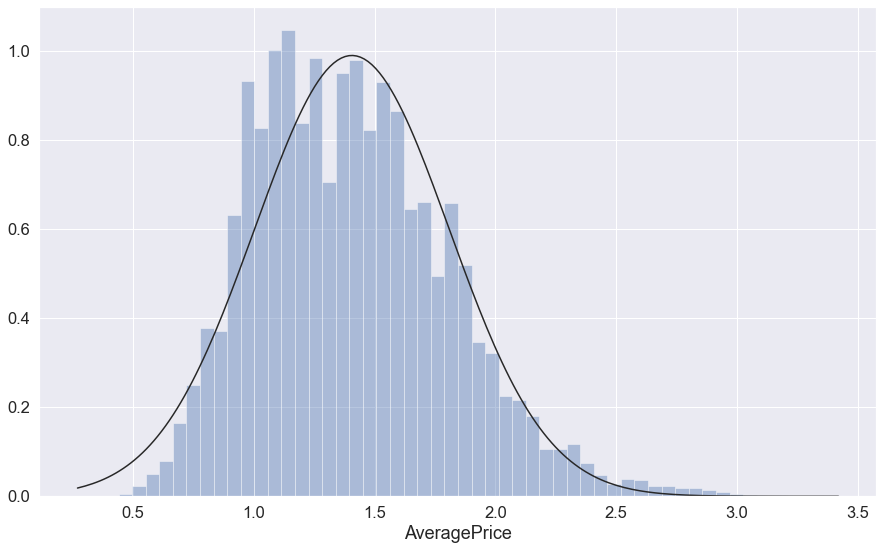

In [9]:
#In which range Average price lies, what is distribution look like?
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

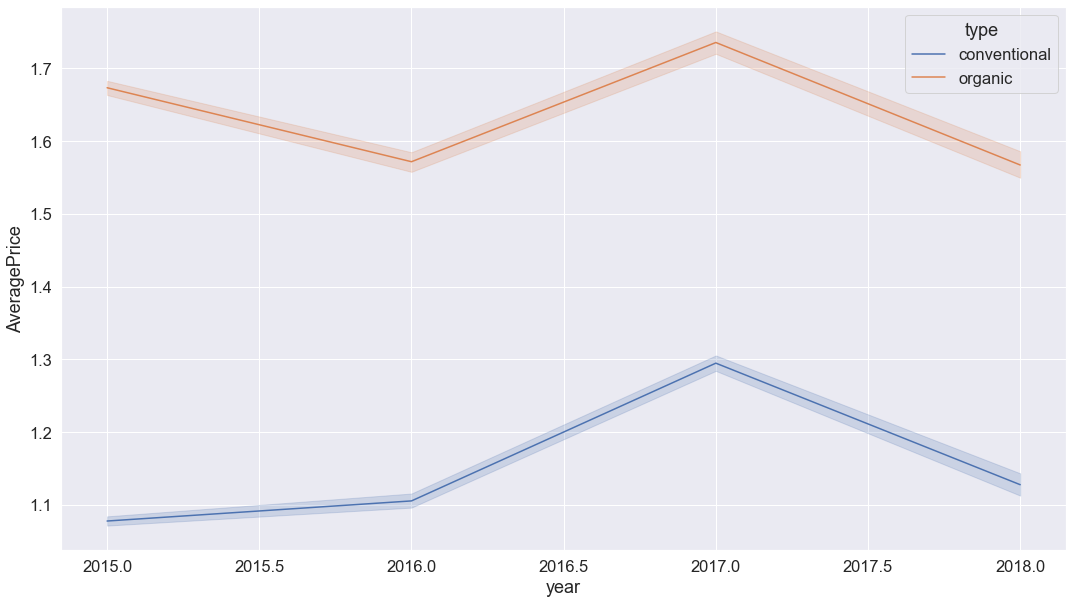

In [10]:
#Average price is distributed over the months for Conventional and Organic Types
plt.figure(figsize=(18,10))
sns.lineplot(x="year", y="AveragePrice", hue='type', data=df)
plt.show()

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

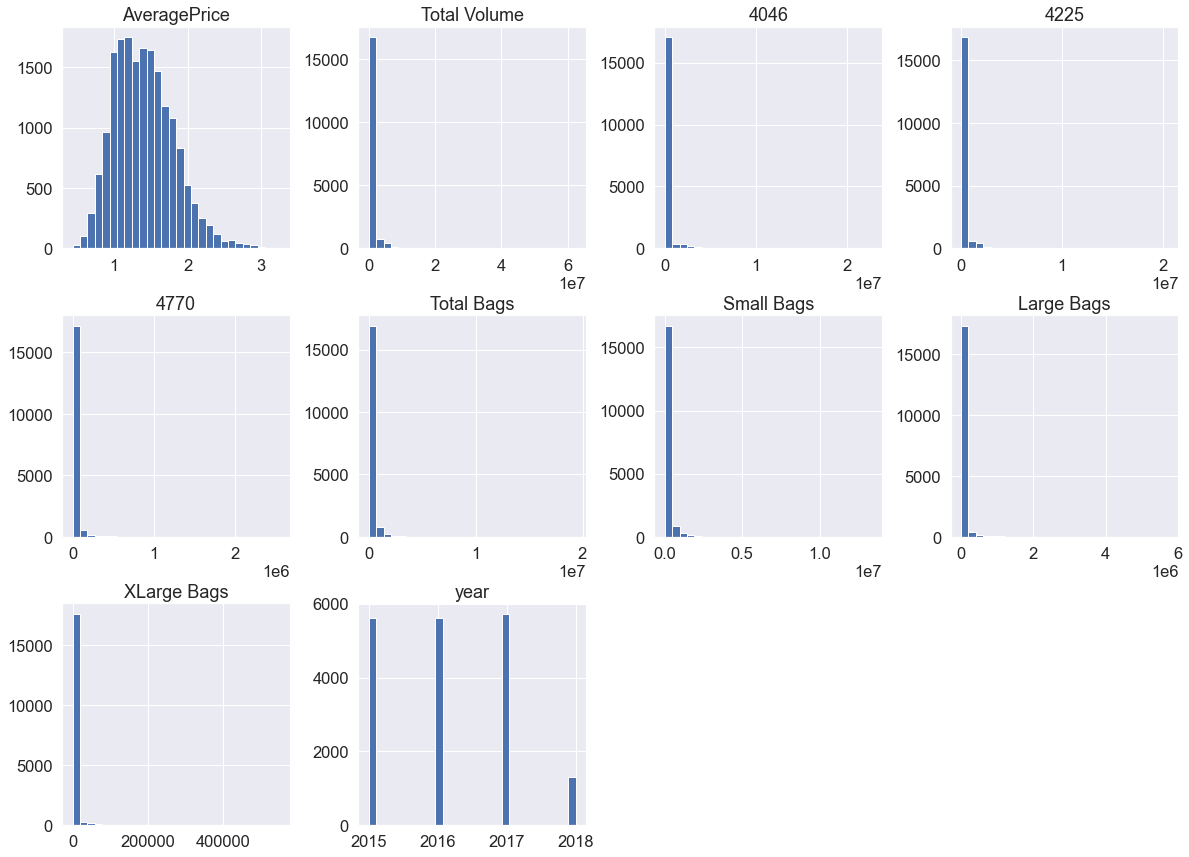

In [11]:
df.hist(figsize=(20,20),grid=True,layout=(4,4), bins=28)

In [12]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [13]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
year            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
dtype: object

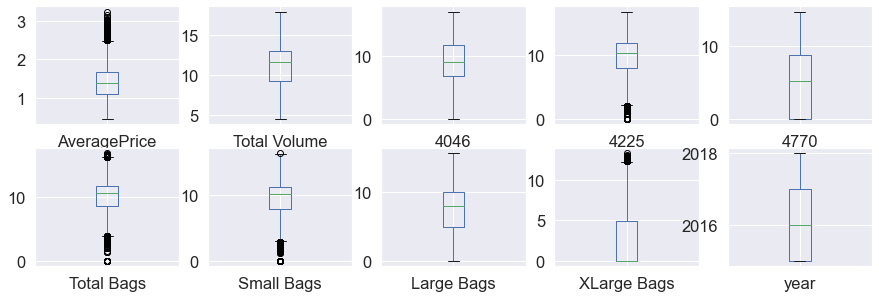

In [14]:
#first check outlier of each column
df.plot(kind='box', subplots=True, layout=(4,5), figsize=(15,10))

### Now lets plot Average price distribution based on region



#### TOP 5 regions where Average price are very high

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

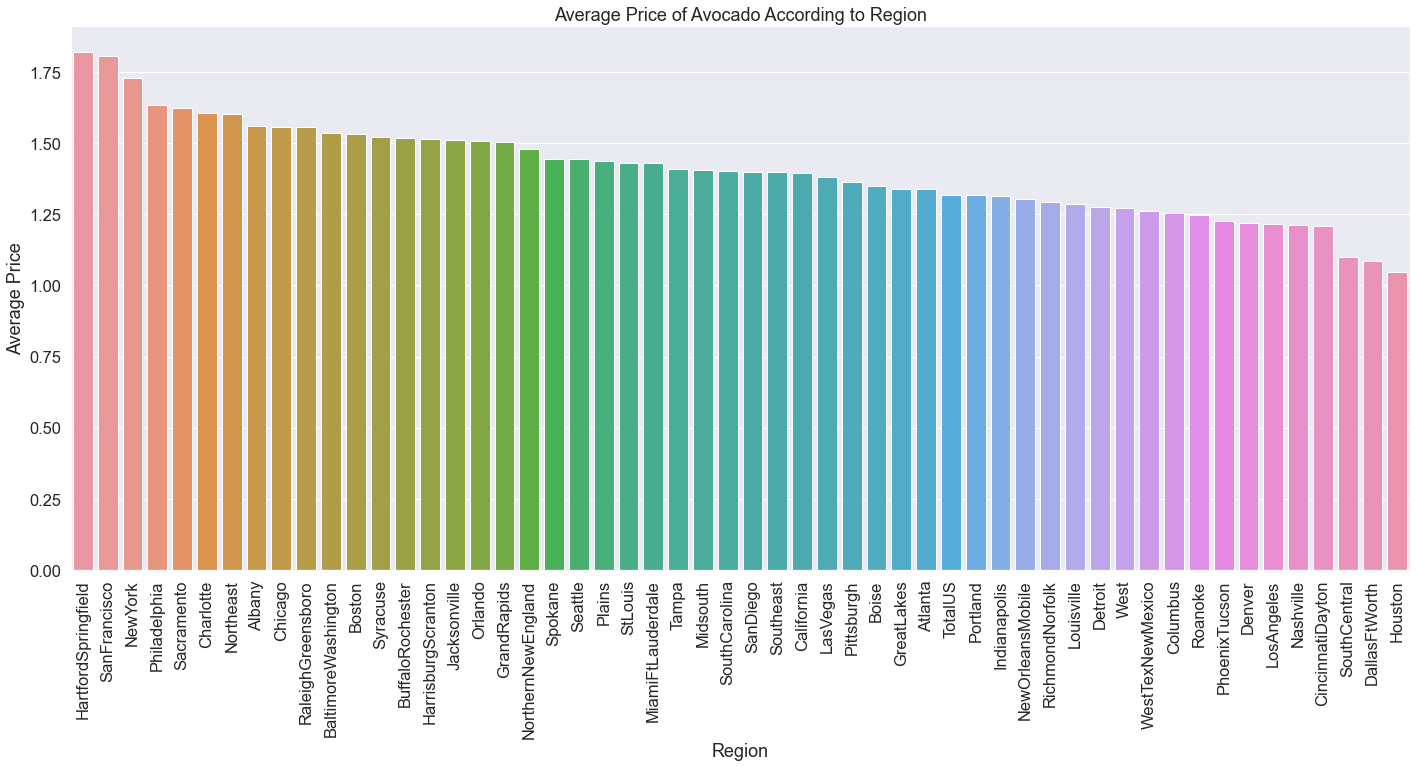

In [15]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

### In which year and for which region was the Average price the highest?


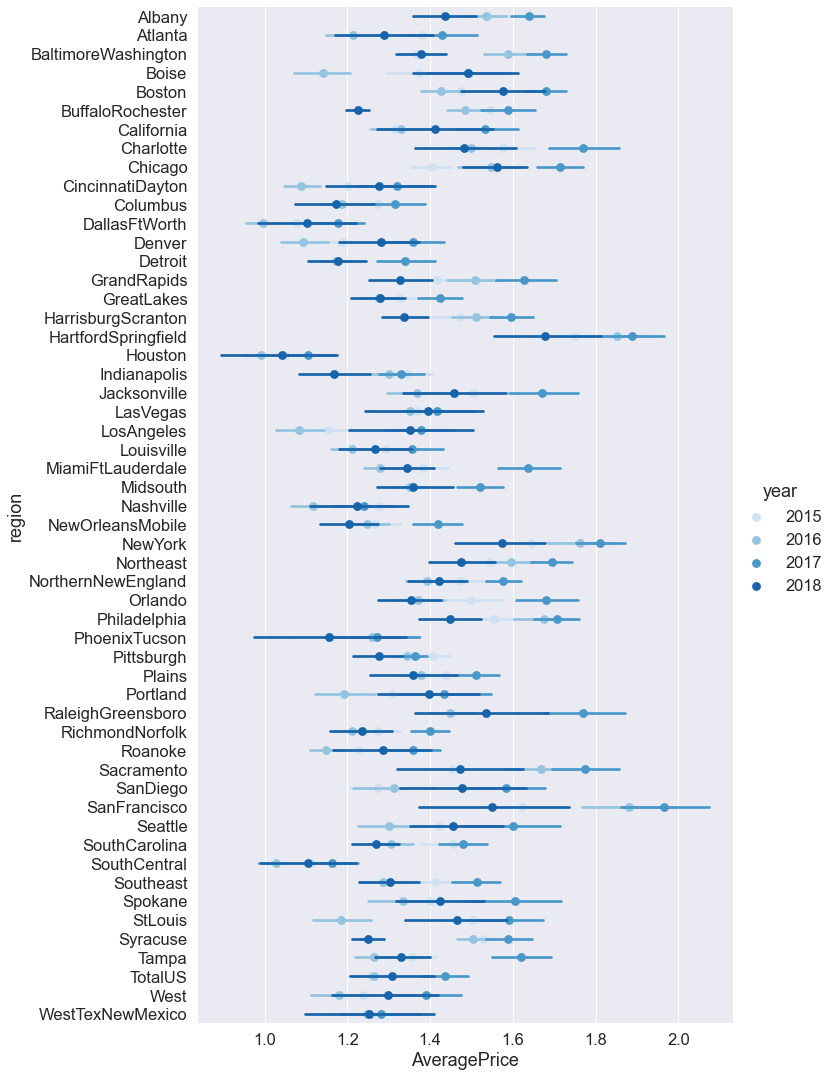

In [16]:
g = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=15,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

### Distributed over the date column

Text(0.5, 1.0, 'Average Price')

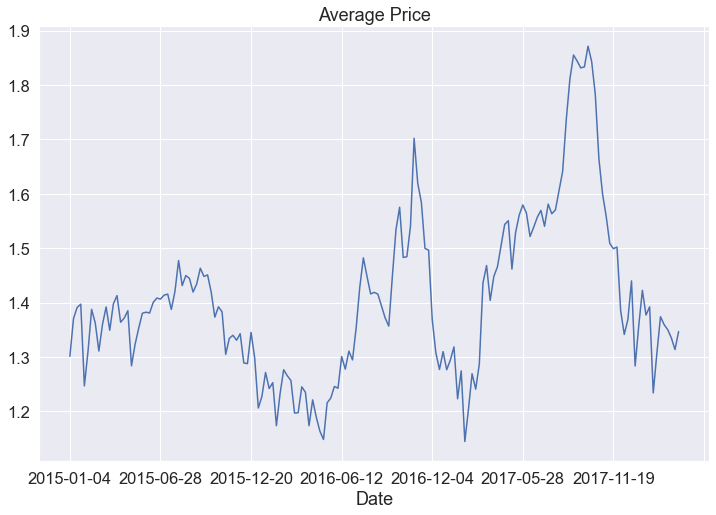

In [17]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

#### Correlation Matrix

<AxesSubplot:>

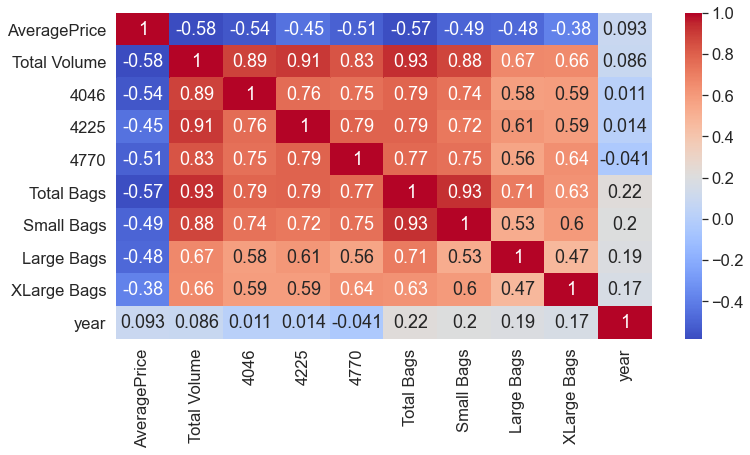

In [18]:

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

### Feature Engineering for Model building

In [19]:
df['region'].nunique()

54

In [20]:
df['type'].nunique()

2

In [21]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

In [22]:
df_final.head()

AveragePrice  Total Volume      4046       4225      4770  Total Bags  \
0          1.33     11.070344  6.944801  10.905146  3.895080    9.070833   
1          1.35     10.912867  6.515127  10.706381  4.083115    9.159737   
2          0.93     11.680313  6.679222  11.600485  4.879007    9.005325   
3          1.08     11.277116  7.032624  11.184108  4.298373    8.667708   
4          1.28     10.840377  6.848515  10.688288  4.340944    8.729874   

   Small Bags  Large Bags  XLarge Bags  year  type_organic  
0    9.060055    4.545951          0.0  2015             0  
1    9.149429    4.589955          0.0  2015             0  
2    8.992584    4.645736          0.0  2015             0  
3    8.644425    4.903495          0.0  2015             0  
4    8.697389    5.291746          0.0  2015             0

### Model selection/predictions

#### Linear Regression

In [23]:
X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

#### Creating and Training the Model

In [24]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [25]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.21907361853507984
MSE: 0.07870662764281182
RMSE: 0.2805470150310137


#### The RMSE is low so we can say that we do have a good model, but lets check to be more sure.
Lets plot the y_test vs the predictions

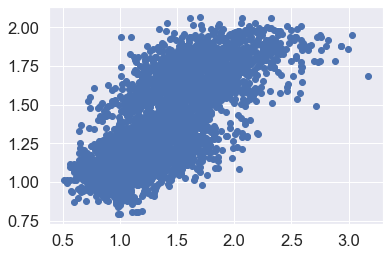

In [26]:
plt.scatter(x=y_test,y=pred)

#### As we can see that we don't have a straight line so I am not sure that this is the best model we can apply on our data

#### Decision Tree Regression model

In [27]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

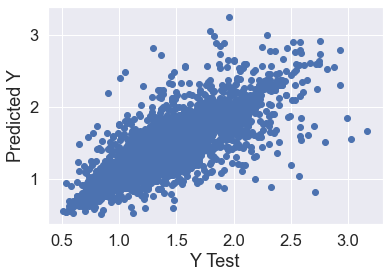

In [28]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Nice, here we can see that we nearly have a straight line, in other words its better than the Linear regression model, and to be more sure lets check the RMSE

In [29]:

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.1577095890410959
MSE: 0.06141430136986301
RMSE: 0.2478190900028951


Very Nice, our RMSE is lower than the previous one we got with Linear Regression. Now I am going to try one last model to see if I can improve my predictions for this data which is the RandomForestRegressor

In [48]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),LinearRegression(),GradientBoostingRegressor(),AdaBoostRegressor()]
max_r2_score=0
for r_state in range(40,90):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=r_state)
    for i in model:
        i.fit(X_train,y_train)
        pred=i.predict(X_test)
        r2_sc=r2_score(y_test,pred)
        print("R2 score correspond to random state", r_state,"is", r2_sc)
        if r2_sc>max_r2_score:
            max_r2_score=r2_sc
            final_state=r_state
            final_model=i

print("max R2 score correspond to random state",final_state,"is",max_r2_score,"and model is", final_model)

        


R2 score correspond to random state 40 is 0.5971690845140494
R2 score correspond to random state 40 is 0.7657298693112882
R2 score correspond to random state 40 is 0.5085306919437059
R2 score correspond to random state 40 is 0.6438019599412854
R2 score correspond to random state 40 is 0.46865600924645034
R2 score correspond to random state 41 is 0.5792698184275993
R2 score correspond to random state 41 is 0.7703350902578711
R2 score correspond to random state 41 is 0.5208662558583883
R2 score correspond to random state 41 is 0.6584263243445392
R2 score correspond to random state 41 is 0.48999234690516213
R2 score correspond to random state 42 is 0.5918395791885467
R2 score correspond to random state 42 is 0.7788702172468506
R2 score correspond to random state 42 is 0.5061829141212446
R2 score correspond to random state 42 is 0.6465589054133994
R2 score correspond to random state 42 is 0.4369227890154782
R2 score correspond to random state 43 is 0.6114464270562014
R2 score correspond to

R2 score correspond to random state 67 is 0.7628799480675412
R2 score correspond to random state 67 is 0.5091691577811428
R2 score correspond to random state 67 is 0.6367792776752537
R2 score correspond to random state 67 is 0.4429647754640893
R2 score correspond to random state 68 is 0.6048310146477974
R2 score correspond to random state 68 is 0.7776206688902939
R2 score correspond to random state 68 is 0.5202301589325378
R2 score correspond to random state 68 is 0.6496465451418773
R2 score correspond to random state 68 is 0.46038501017198086
R2 score correspond to random state 69 is 0.6171107984470473
R2 score correspond to random state 69 is 0.7778370846416205
R2 score correspond to random state 69 is 0.5259229138646229
R2 score correspond to random state 69 is 0.6638329802103549
R2 score correspond to random state 69 is 0.47638105461114777
R2 score correspond to random state 70 is 0.6180898649660019
R2 score correspond to random state 70 is 0.7682914321268901
R2 score correspond to

In [54]:
from sklearn.model_selection import GridSearchCV

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=80,test_size=0.33)
KN=KNeighborsRegressor()
parameters={'n_neigbors':range(1,30)}
gridsearch=GridSearchCV(LA, parameters)
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

NameError: name 'LA' is not defined

### Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.12026123287671232
MSE: 0.031134467350684925
RMSE: 0.17644961703184545


we can see the RMSE is lower than the two previous models, so the RandomForest Regressor is the best model in this case

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

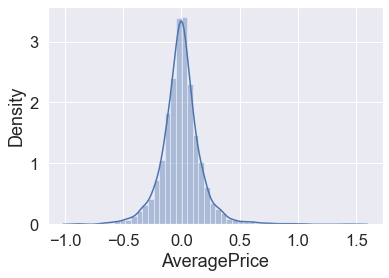

In [32]:
sns.distplot((y_test-pred),bins=50)

Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.


#### Actual Vs Predicted

Y Test    Pred
1993     1.06  1.0881
5972     1.13  1.1293
14069    2.12  1.6895
4295     1.14  1.2058
6750     1.30  1.1573

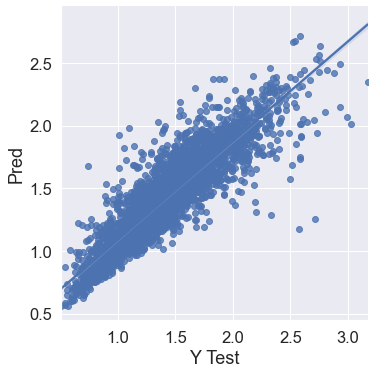

In [53]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()